In [1]:
%pylab inline
from scipy.stats import beta, gamma

Populating the interactive namespace from numpy and matplotlib


##Homework #4

<b>8.62)</b> Show that the gamma distribution is a conjugate prior for the exponential distribution.

From Wikipedia: In Bayesian probability theory, if the posterior distributions p(θ|x) are in the same family as the prior probability distribution p(θ), the prior and posterior are then called conjugate distributions.

Here the prior is the Gamma, which has the following dist:

$$f(\alpha, \theta, x) = \frac 1 {\Gamma (\alpha) \theta^{\alpha} } x^{(\alpha - 1)} e^{-x/\theta}$$

It should be clear that when $\alpha = 1$, we are left with the exponential distribution and therefore the posterior is in the same family as the prior. 


Suppose that the waiting time in a queue is modeled as an exponential
random variable with unknown parameter λ, and that the average time to serve a
random sample of 20 customers is 5.1 minutes. A gamma distribution is used as
a prior. Consider two cases: (1) the mean of the gamma is 0.5 and the standard
deviation is 1, and (2) the mean is 10 and the standard deviation is 20. Plot the
two posterior distributions and compare them. Find the two posterior means and
compare them. Explain the differences.

Following along from the example in the book yields:

$$f_{\Lambda | X} (\lambda | x) \propto \lambda^{\sum x_i + \alpha -1} e^{-\lambda (n + 1/\theta)} $$

Here $\sum x_i = 102$, $n = 20$. If the prior has the mean equal to 0.5 and the standard deviation equal to 1. Then

$$f_{\Lambda | X} (\lambda | x) \propto \lambda^{102.5 -1} e^{-\lambda (20.5)} $$

and therefore, the posterior mean $\mu = \alpha \theta = 102.5/20.5 = 5$

If the prior has the mean equal to 10 and the standard deviation equal to 20. Then

$$f_{\Lambda | X} (\lambda | x) \propto \lambda^{102.5 -1} e^{-\lambda (20.025)} $$

and therefore, the posterior mean $\mu = \alpha \theta = 102.5/20.025 = 5.118602$

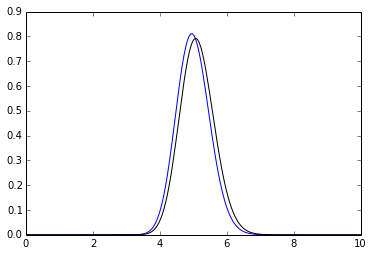

In [17]:
x = linspace(0,10,200)
a_1 = 102.5
theta_1 = 1/20.5
theta_2 = 1/20.025
plot(x, gamma.pdf(x,a_1, scale = theta_1))
plot(x, gamma.pdf(x,a_1, scale = theta_2), 'k');

The difference is that the blue line is a little more sharply peaked at the wrong value, while the black line is flatter and is centered closer to the true value (or at least what we assume to be the true value). This means that the larger standard deviation of the second method gve us a better approximation.

<b>8.63)</b> Suppose that 100 items are sampled from a manufacturing process and 3 are found
to be defective. A beta prior is used for the unknown proportion θ of defective
items. Consider two cases: (1) a = b = 1, and (2) a = 0.5 and b = 5. Plot the
two posterior distributions and compare them. Find the two posterior means and
compare them. Explain the differences.

$$f_{\Lambda | X} (\lambda | x) \propto f_{X | \Lambda } (x |\lambda ) f_{ \Lambda } (\lambda )$$

$$ f_{ \Lambda } (\lambda ) = \frac {\Gamma (\alpha +\beta)}{\Gamma (\alpha) \Gamma (\beta)} \lambda^{(\alpha -1)} (1 - \lambda)^{(\beta - 1)}$$

$$f_{X | \Lambda } (x |\lambda ) = {n \choose x} \lambda^x (1 - \lambda)^{(n - x)}$$

$$f_{\Lambda | X} (\lambda | x) \propto  \lambda^{(x+\alpha -1)} (1 - \lambda)^{(n - x +\beta - 1)}$$

So, in the first case, the posterior mean is

$$\mu = \frac {\alpha}{\alpha + \beta} = \frac 4 {4+ 97 + 1} = 0.0392156$$

In the second case, the posterior mean is

$$\mu = \frac {\alpha}{\alpha + \beta} = \frac {3.5} {3.5+ 97 + 5} = 0.03317536$$


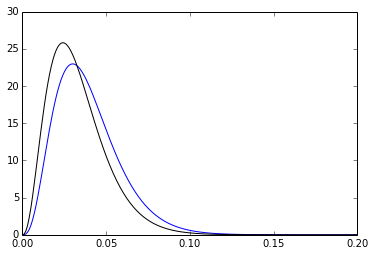

In [21]:
x = linspace(0,0.2,200)
a_1 = 4
b_1 = 98
a_2 = 3.5
b_2 = 102
plot(x, beta.pdf(x,a_1, b_1))
plot(x, beta.pdf(x,a_2, b_2), 'k');

Here, the black line is much more sharply peaked than the blue one. To see why, we can look at the priors:

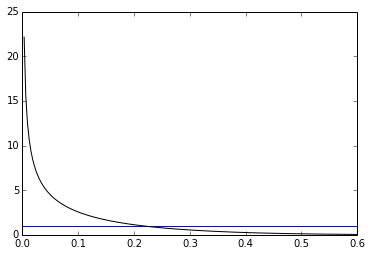

In [24]:
x = linspace(0,0.6,200)
a_1 = 1
b_1 = 1
a_2 = 0.5
b_2 = 5
plot(x, beta.pdf(x,a_1, b_1))
plot(x, beta.pdf(x,a_2, b_2), 'k');

Thus, we can see that the blue prior started off flatter, so we are not surprsed that it stayed that way.

<b>8.64)</b> This is a continuation of the previous problem. Let X = 0 or 1 according to
whether an item is defective. For each choice of the prior, what is the marginal
distribution of X before the sample is taken? What are the marginal distributions after the sample is taken? (Hint: for the second question, use the posterior
distribution of θ.)

<b>8.65)</b> Suppose that a random sample of size 20 is taken from a normal distribution
with unknown mean and known variance equal to 1, and the mean is found to
be $\bar{x}$ = 10. A normal distribution was used as the prior for the mean, and it was
found that the posterior mean was 15 and the posterior standard deviation was
0.1. What were the mean and standard deviation of the prior?

From the book, we have:

$$\xi_{\text{post}} = n \xi_{0} + \xi_{\text{prior}}$$


.

$$\theta_{\text{post}} = \frac {n\xi_{0} \bar{x} + \theta_0 \xi_{\text{prior}}}{n \xi_{0} +\xi_{\text{prior}}}$$

First, let's find $\xi_{\text{prior}}$

We know that the posterior $\sigma = 0.1$ and therefore $\sigma^2 = 0.01 = 1/\xi_{\text{post}} ~~ \rightarrow ~~ \xi_{\text{post}}$. Therefore

$$\xi_{\text{post}} = n \xi_{0} + \xi_{\text{prior}} ~~~ \rightarrow ~~~~ 100 = 20 + \xi_{\text{prior}} $$

$$ \rightarrow ~~~~~ \xi_{\text{prior}}  = 80$$


Now, to find $\theta_0$


$$15 = \frac {200 + 80 \theta_0 }{20 + 80} ~~~ \rightarrow ~~~ \theta_0 = 16.25$$


<b>8.66)</b> Let the unknown probability that a basketball player makes a shot successfully
be θ. Suppose your prior on θ is uniform on [0, 1] and that she then makes two
shots in a row. Assume that the outcomes of the two shots are independent.

a. What is the posterior density of θ ?

b. What would you estimate the probability that she makes a third shot to be?